<a href="https://colab.research.google.com/github/eb2033/DSP-with-Python/blob/main/QPSK_Modulation_and_Demodulation_for_String_Encoding_with_Noise_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Received Text = Cybersecurity


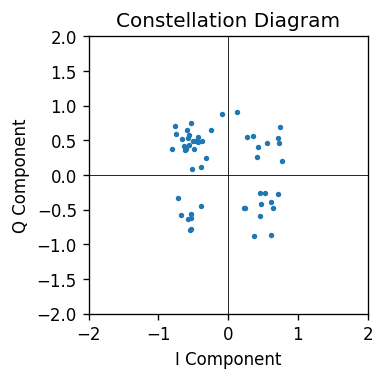

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

send_text = "Cybersecurity"
binary = ''
for i in send_text:
  binary +=''.join(format(ord(i), '08b')) # ord() gets ASCII code of character, format(...,'08b') converts it to 8-bit binary

binary_array = []
for i in range(len(binary)):
  binary_array.append(int(binary[i]))

transmit_bits = np.array(binary_array)
num_bits = len(binary)

I_tx = (2*transmit_bits[::2] - 1) * 0.5
Q_tx = (2*transmit_bits[1::2] -1) * 0.5

amplitude = math.sqrt(0.5**2 + 0.5**2)
signal_power = amplitude ** 2
SNR = 8
standard_deviation = math.sqrt(signal_power / (2 * SNR))

# Using a normal distribution for the noise and making a random imaginary number
noise = np.random.normal(0, standard_deviation, int(num_bits/2)) + 1j * np.random.normal(0, standard_deviation, int(num_bits/2))

# Creating the signal and storing it as a complex number
sig_tx = I_tx + 1j*Q_tx + noise

# received signal
received_I = sig_tx.real
received_Q = sig_tx.imag

rx_data = np.empty(num_bits)
rx_data[::2] = received_I
rx_data[1::2] = received_Q

# Converts from amplitudes to 1s or 0s depending on the phase
'''
for i in range(len(rx_data)):
  if rx_data[i] >= 0:
    rx_data[i] = 1
  else:
    rx_data[i] = 0
rx_data = rx_data.astype(int)
'''

# This does the same as the code above just more efficiently
# Checks if each element in the array is >= 0, returning True or False; astype(int) then converts True to 1 and False to 0
rx_data = (rx_data >= 0).astype(int)

received_text = ""
for i in range(0, len(rx_data), 8):
    byte = rx_data[i:i+8]
    value = 0
    for b in byte:
        value = (value << 1) | b   # Converts bits to integer
    received_text += chr(value)             # Converts integer to ASCII character

print('Received Text =',received_text)

fig = plt.figure(figsize=(3, 3), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(sig_tx.real, sig_tx.imag, s=5)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('I Component')
plt.ylabel('Q Component')
plt.title('Constellation Diagram')
plt.show()

Received Text = Cybersecurity


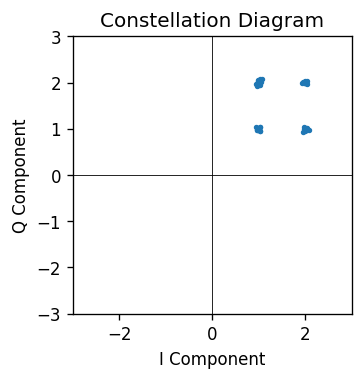

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

send_text = "Cybersecurity"
binary = ''
for i in send_text:
  binary +=''.join(format(ord(i), '08b')) # ord() gets ASCII code of character, format(...,'08b') converts it to 8-bit binary

binary_array = []
for i in range(len(binary)):
  binary_array.append(int(binary[i]))

transmit_bits = np.array(binary_array)
num_bits = len(binary)

# Custom symbol mapping
# Mapping 2 bits to complex symbols:
# 00 → 1 + 1j
# 01 → 1 + 2j
# 11 → 2 + 2j
# 10 → 2 + 1j
symbol_map = {
    (0,0): 1 + 1j,
    (0,1): 1 + 2j,
    (1,1): 2 + 2j,
    (1,0): 2 + 1j
}

# Modulation using the custom mapping
I_tx = []
Q_tx = []
for i in range(0, len(transmit_bits), 2):
    bits_pair = (transmit_bits[i], transmit_bits[i+1])
    symbol = symbol_map[bits_pair] # Lookup symbol for the 2-bit pair
    I_tx.append(symbol.real) # Store I component
    Q_tx.append(symbol.imag) # Store Q component

I_tx = np.array(I_tx)
Q_tx = np.array(Q_tx)

# See the accompanying document for an explanation of the maths
amplitude = math.sqrt(0.5**2 + 0.5**2)
signal_power = amplitude ** 2
SNR = 10 ** 2.5
standard_deviation = math.sqrt(signal_power / (2 * SNR))

# Using a normal distribution for the noise and making a random imaginary number
noise = np.random.normal(0, standard_deviation, int(num_bits/2)) + 1j * np.random.normal(0, standard_deviation, int(num_bits/2))

# Creating the signal and storing it as a complex number
sig_tx = I_tx + 1j*Q_tx + noise

# received signal
received_I = sig_tx.real
received_Q = sig_tx.imag

# Demodulation (minimum-distance decoding)
symbols = np.array(list(symbol_map.values())) # [1+1j, 1+2j, 2+2j, 2+1j]
symbol_bits = list(symbol_map.keys()) # [(0,0), (0,1), (1,1), (1,0)]
rx_bits = []

for r in sig_tx: # for each received symbol
    distances = np.abs(r - symbols) # compute distance to all valid symbols
    idx = np.argmin(distances) # find the index of the closest symbol
    rx_bits.extend(symbol_bits[idx]) # add the corresponding 2 bits to the output
                                              # .extend() adds each element of the tuple individually
                                              # e.g., (0,1) becomes 0 and 1 appended separately

received_text = ""
for i in range(0, len(rx_data), 8):
    byte = rx_data[i:i+8]
    value = 0
    for b in byte:
        value = (value << 1) | b # Converts bits to integer
    received_text += chr(value) # Converts integer to ASCII character

print('Received Text =',received_text)

fig = plt.figure(figsize=(3, 3), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(sig_tx.real, sig_tx.imag, s=5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('I Component')
plt.ylabel('Q Component')
plt.title('Constellation Diagram')
plt.show()